In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
from tqdm import tqdm
import tensorflow as tf

In [2]:
#defining train data set
train_dir='aks/data'
Train_Data=tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=64,subset="training",target_size=(96,96),shuffle=False)


Found 385 images belonging to 2 classes.


In [3]:
list(Train_Data.class_indices.keys())

['ahmed_khairullah', 'ahmed_khaled']

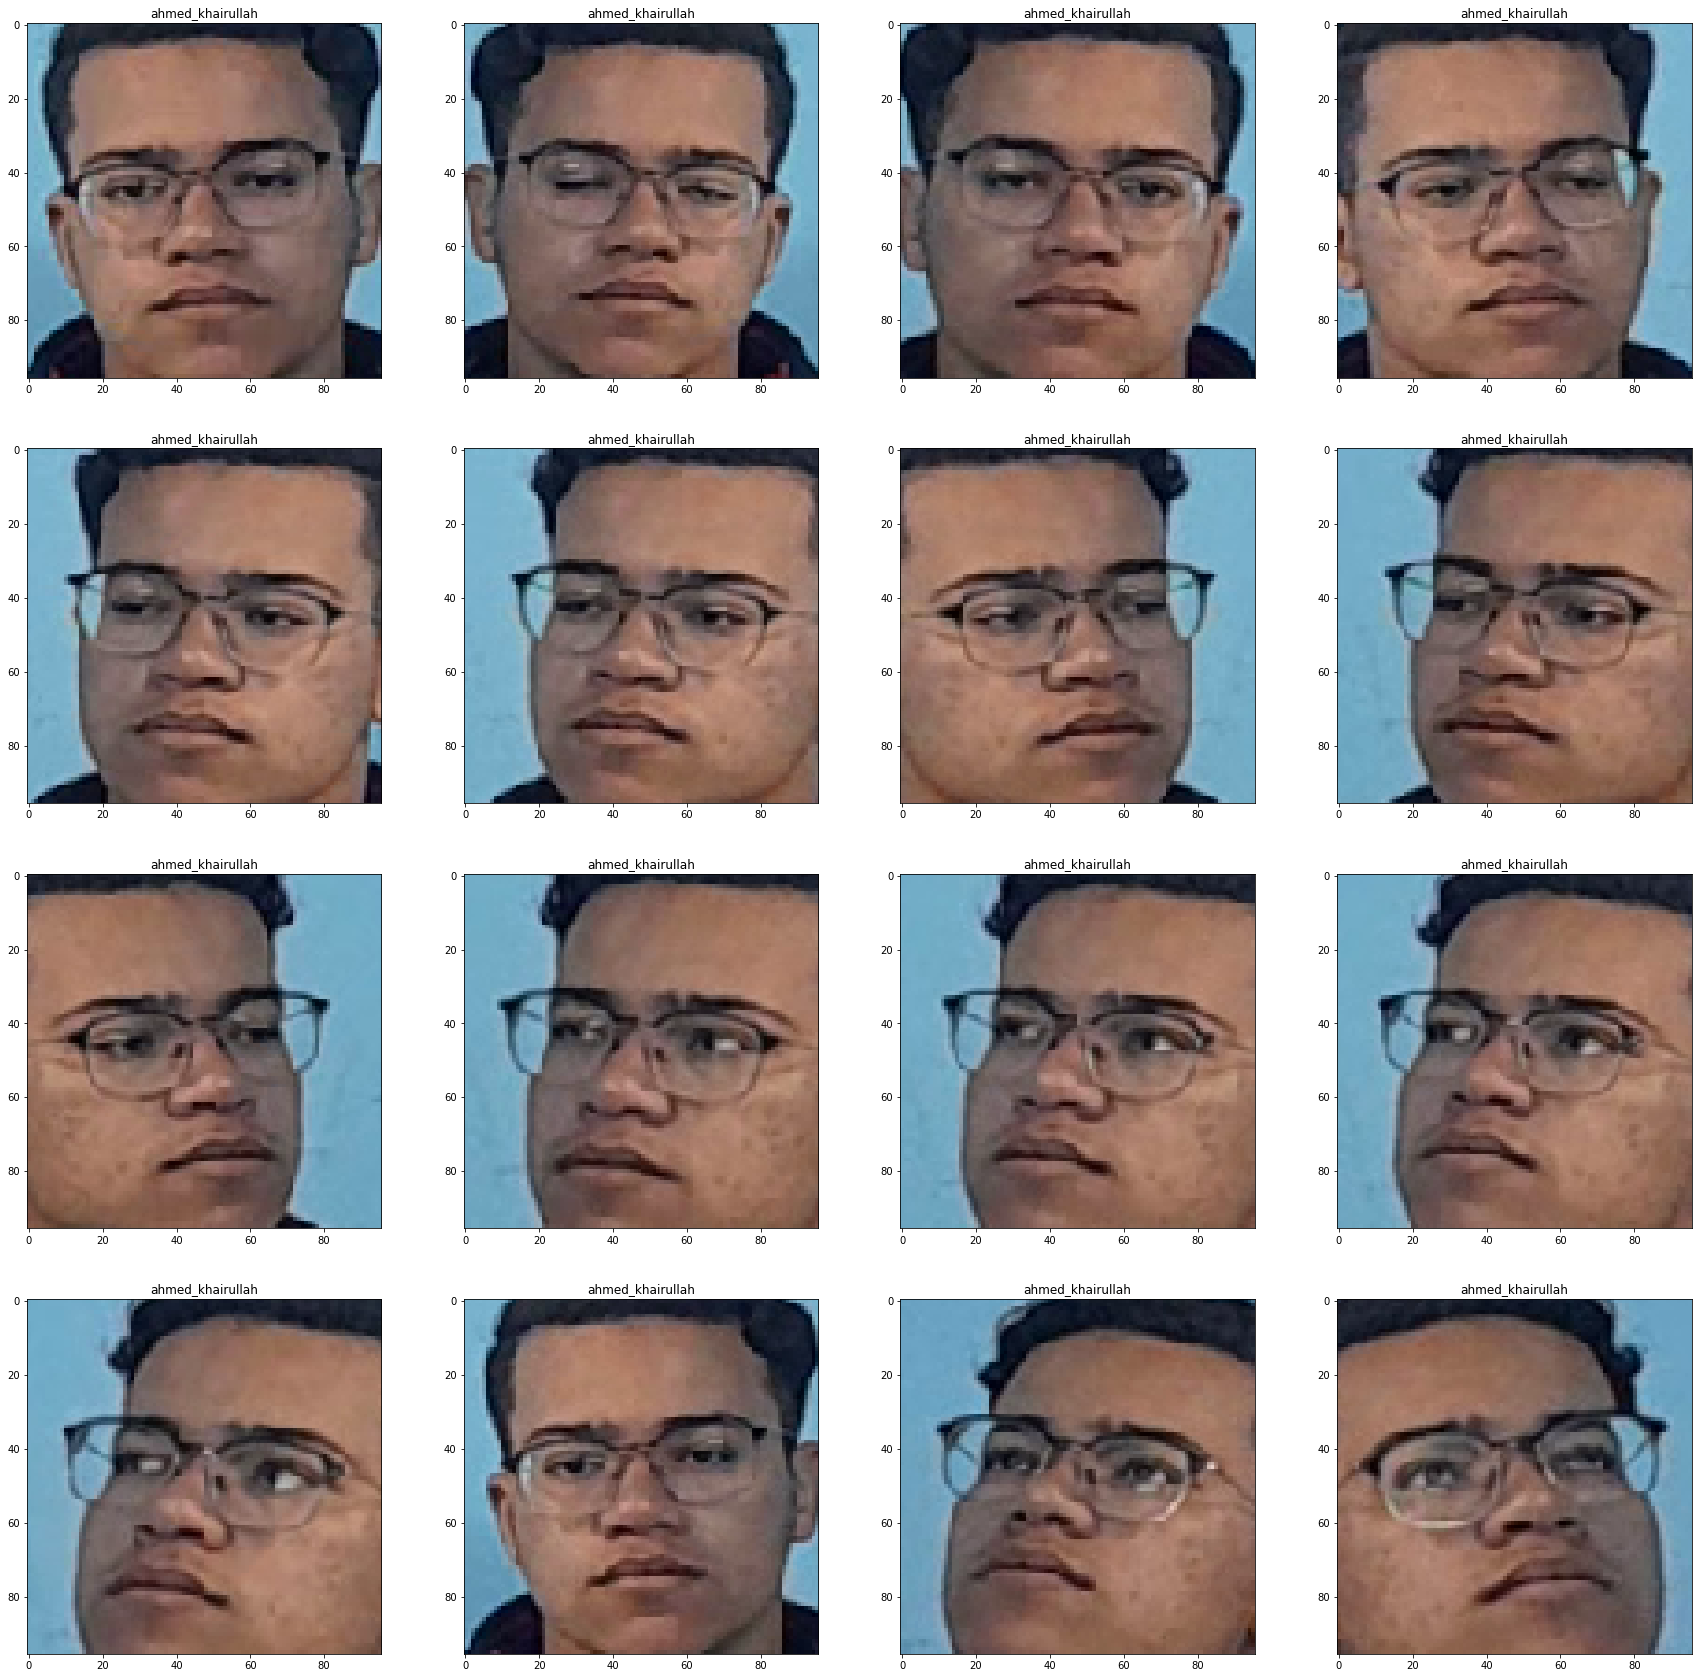

In [4]:
classes=list(Train_Data.class_indices.keys())
plt.figure(figsize=(30,30))
for X_batch, y_batch in Train_Data:
    # create a grid of 7x7 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [8]:
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.layers import  Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout ,ZeroPadding2D 
from tensorflow.keras.layers import Activation,ZeroPadding2D,Lambda, concatenate , AveragePooling2D
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, Input, Add, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate, Lambda, add, GlobalAveragePooling2D, Convolution2D, LocallyConnected2D, ZeroPadding2D, concatenate, AveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend as K
def builtModel():
    myInput = Input(shape=(96, 96, 3))

    x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)
    x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_1')(x)
    x = Conv2D(64, (1, 1), name='conv2')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = Conv2D(192, (3, 3), name='conv3')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
    x = Activation('relu')(x)
    Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_2')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)
    
    # Inception3a
    inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
    inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
    inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
    
    inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
    inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
    inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
    
    inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
    inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
    inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
    inception_3a_pool = Activation('relu')(inception_3a_pool)
    inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)
    
    inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
    inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
    inception_3a_1x1 = Activation('relu')(inception_3a_1x1)
    
    inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)
    
    # Inception3b
    inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
    inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
    inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
        
    inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
    inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
    inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
    
    inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
    inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
    inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
    inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
    inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
    inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
    inception_3b_pool = Activation('relu')(inception_3b_pool)
    inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)
    
    inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
    inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
    inception_3b_1x1 = Activation('relu')(inception_3b_1x1)
    
    inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)
    
    # Inception3c
    inception_3c_3x3 = Conv2D(128, (1, 1), strides=(1, 1), name='inception_3c_3x3_conv1')(inception_3b)
    inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
    inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
    inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
    inception_3c_3x3 = Conv2D(256, (3, 3), strides=(2, 2), name='inception_3c_3x3_conv'+'2')(inception_3c_3x3)
    inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn'+'2')(inception_3c_3x3)
    inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
    
    inception_3c_5x5 = Conv2D(32, (1, 1), strides=(1, 1), name='inception_3c_5x5_conv1')(inception_3b)
    inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
    inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
    inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
    inception_3c_5x5 = Conv2D(64, (5, 5), strides=(2, 2), name='inception_3c_5x5_conv'+'2')(inception_3c_5x5)
    inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn'+'2')(inception_3c_5x5)
    inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
    
    inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
    inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)
    
    inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)
    
    #inception 4a
    inception_4a_3x3 = Conv2D(96, (1, 1), strides=(1, 1), name='inception_4a_3x3_conv'+'1')(inception_3c)
    inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'1')(inception_4a_3x3)
    inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
    inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
    inception_4a_3x3 = Conv2D(192, (3, 3), strides=(1, 1), name='inception_4a_3x3_conv'+'2')(inception_4a_3x3)
    inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'2')(inception_4a_3x3)
    inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

    inception_4a_5x5 = Conv2D(32, (1,1), strides=(1,1), name='inception_4a_5x5_conv1')(inception_3c)
    inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
    inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
    inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
    inception_4a_5x5 = Conv2D(64, (5,5), strides=(1,1), name='inception_4a_5x5_conv'+'2')(inception_4a_5x5)
    inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn'+'2')(inception_4a_5x5)
    inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
    
    inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
    inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
    inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
    inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)
    
    inception_4a_pool = Conv2D(128, (1,1), strides=(1,1), name='inception_4a_pool_conv'+'')(inception_4a_pool)
    inception_4a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_pool_bn'+'')(inception_4a_pool)
    inception_4a_pool = Activation('relu')(inception_4a_pool)
    inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)
    
    inception_4a_1x1 = Conv2D(256, (1, 1), strides=(1, 1), name='inception_4a_1x1_conv'+'')(inception_3c)
    inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn'+'')(inception_4a_1x1)
    inception_4a_1x1 = Activation('relu')(inception_4a_1x1)
    
    inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)
    
    #inception4e
    inception_4e_3x3 = Conv2D(160, (1,1), strides=(1,1), name='inception_4e_3x3_conv'+'1')(inception_4a)
    inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'1')(inception_4e_3x3)
    inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
    inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
    inception_4e_3x3 = Conv2D(256, (3,3), strides=(2,2), name='inception_4e_3x3_conv'+'2')(inception_4e_3x3)
    inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'2')(inception_4e_3x3)
    inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

    inception_4e_5x5 = Conv2D(64, (1,1), strides=(1,1), name='inception_4e_5x5_conv'+'1')(inception_4a)
    inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'1')(inception_4e_5x5)
    inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
    inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
    inception_4e_5x5 = Conv2D(128, (5,5), strides=(2,2), name='inception_4e_5x5_conv'+'2')(inception_4e_5x5)
    inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'2')(inception_4e_5x5)
    inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
    
    inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
    inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)
    
    inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)
    
    #inception5a
    inception_5a_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_3x3_conv'+'1')(inception_4e)
    inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'1')(inception_5a_3x3)
    inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
    inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
    inception_5a_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5a_3x3_conv'+'2')(inception_5a_3x3)
    inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'2')(inception_5a_3x3)
    inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
    
    inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
    inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
    inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
    inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)
    
    inception_5a_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_pool_conv'+'')(inception_5a_pool)
    inception_5a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_pool_bn'+'')(inception_5a_pool)
    inception_5a_pool = Activation('relu')(inception_5a_pool)
    inception_5a_pool = ZeroPadding2D(padding=(1,1))(inception_5a_pool)
    
    inception_5a_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5a_1x1_conv'+'')(inception_4e)
    inception_5a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_1x1_bn'+'')(inception_5a_1x1)
    inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

    inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

    #inception_5b
    inception_5b_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_3x3_conv'+'1')(inception_5a)
    inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'1')(inception_5b_3x3)
    inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
    inception_5b_3x3 = ZeroPadding2D(padding=(1,1))(inception_5b_3x3)
    inception_5b_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5b_3x3_conv'+'2')(inception_5b_3x3)
    inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'2')(inception_5b_3x3)
    inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
    
    inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
    
    inception_5b_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_pool_conv'+'')(inception_5b_pool)
    inception_5b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_pool_bn'+'')(inception_5b_pool)
    inception_5b_pool = Activation('relu')(inception_5b_pool)
    
    inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)
    
    inception_5b_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5b_1x1_conv'+'')(inception_5a)
    inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn'+'')(inception_5b_1x1)
    inception_5b_1x1 = Activation('relu')(inception_5b_1x1)

    inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

    av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
    reshape_layer = Flatten()(av_pool)
    dense_layer = Dense(128, name='dense_layer')(reshape_layer)
    norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)
    
    # Final Model
    model = Model(inputs=[myInput], outputs=norm_layer)
    return model

model = builtModel()
print("model built")

model built


In [9]:
model.load_weights('openface_weights.h5')
print("weights loaded")

weights loaded


In [10]:
embedding_vector = model.predict(Train_Data,steps=len(Train_Data), verbose=1)

7/7 [==============================] - 1s 185ms/step


In [11]:
np.save('Xofdata',embedding_vector)

In [12]:
y_train=Train_Data.labels

In [13]:
np.save('yofdata',y_train)

In [15]:
embedding_vector = np.load('Xofdata.npy')
y_train = np.load('yofdata.npy')

In [16]:
embedding_vector[0]

array([-0.03710064,  0.13408501,  0.02357705, -0.04172233, -0.09280474,
        0.18042436, -0.02608728,  0.04072247, -0.06401829,  0.0760234 ,
        0.03866563, -0.13651659,  0.00839968, -0.09293113,  0.1568721 ,
       -0.07155362, -0.14669913, -0.05550394,  0.05302175, -0.02575936,
       -0.05392978, -0.0512807 ,  0.12170197,  0.05938788,  0.0286481 ,
        0.00225004,  0.01968894, -0.13754612,  0.10675568, -0.14586805,
        0.14619663, -0.08870085, -0.04840402,  0.00905285,  0.03769695,
        0.0856033 , -0.02189951,  0.12320777, -0.0449283 ,  0.04053193,
        0.02583137, -0.13739681, -0.16863875,  0.09367692, -0.12937905,
        0.01223494,  0.08917979,  0.07702076, -0.14003833,  0.02888157,
       -0.07037199,  0.09109444,  0.01175701, -0.04131392, -0.01064112,
        0.03631111,  0.03269353,  0.0955773 ,  0.05381013, -0.16204153,
       -0.16222872,  0.02667927,  0.17144462, -0.09410013,  0.05805213,
        0.09104894,  0.10439146, -0.03334314, -0.04651223,  0.16

In [17]:
y_train[0]

0

In [18]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(embedding_vector,y_train)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.1,shuffle=True, stratify=y_train,random_state=42)

In [20]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
X_train.shape

(346, 128)

In [23]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=2.,class_weight='balanced',decision_function_shape='ovo',probability=True)
clf.fit(X_train, y_train)

SVC(C=2.0, class_weight='balanced', decision_function_shape='ovo',
    kernel='linear', probability=True)

In [24]:
y_predict = clf.predict(X_test)

In [25]:
y_predict[:5]

array([1, 1, 0, 1, 1])

In [26]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9743589743589743

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        20

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



In [29]:
from numpy import expand_dims
from cv2 import resize,INTER_CUBIC
from tensorflow.keras.preprocessing.image import  img_to_array

def preprocess_image(img):
    img = img_to_array(img)
    img = img/255.0
    img = expand_dims(img, axis=0)
    return img

def Face_Recognition(roi,model,scaler,pca,clf):
    roi=resize(roi,dsize=(96,96),interpolation=INTER_CUBIC)
    roi=preprocess_image(roi)
    embedding_vector = model.predict(roi)[0]

    embedding_vector=scaler.transform(embedding_vector.reshape(1, -1))
    embedding_vector_pca = pca.transform(embedding_vector)
    result1 = clf.predict(embedding_vector_pca)[0]
    #print(result1)
    y_predict = clf.predict_proba(embedding_vector_pca)[0]
    #print(y_predict)
    
    result = np.where(y_predict > 0.6)[0]
    
    return result

In [30]:
print((list(Train_Data.class_indices.keys())))

['ahmed_khairullah', 'ahmed_khaled']


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mtcnn.mtcnn import MTCNN
detector=MTCNN()
cap=cv2.VideoCapture('Test Face 1.avi')
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)


def ImageClass(n):
    for x , y in classes.items():
        if n == y :
            return x
size = (1600, 1200)

result_video = cv2.VideoWriter('Output Test Face 1.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)
font = cv2.FONT_HERSHEY_SIMPLEX     
fontScale = 1
color = (255, 0, 0)
thickness = 2
other = 0
while True :
    ret, frame = cap.read()
    if not ret:
        break  
    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    frame=cv2.resize(frame,(1600,1200),interpolation=cv2.INTER_CUBIC)
    frame=cv2.GaussianBlur(frame, ksize=(3,3), sigmaX=0)
    detections=detector.detect_faces(frame)

    for det in detections:
        if det['confidence'] >= 0.93:
            x, y, w, h = det['box']
            roi=frame[y:y+h,x:x+w]
            roi = cv2.resize(roi,(96,96),interpolation=cv2.INTER_CUBIC)
            result=Face_Recognition(roi,model,scaler,pca,clf)
            if len(result) > 1 :
                cv2.putText(frame, ImageClass(result[0]) , (x-5,y-5), font,fontScale, color, thickness, cv2.LINE_AA)
            elif  len(result)== 0 :
                roi=cv2.cvtColor(roi,cv2.COLOR_RGB2BGR)  
                cv2.imwrite(f'Pic{other}.png', roi)
                cv2.putText(frame, 'Other' , (x-5,y-5), font,fontScale, color, thickness, cv2.LINE_AA)
                other = other + 1
            else :
                cv2.putText(frame, ImageClass(result) , (x-5,y-5), font,fontScale, color, thickness, cv2.LINE_AA)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    frame=cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)             
    result_video.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
result_video.release()
cv2.destroyAllWindows() 

In [62]:
from joblib import dump, load

In [63]:
dump(scaler, 'scaler.joblib') 

['scaler.joblib']

In [64]:
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [65]:
dump(clf, 'SVC.joblib') 

['SVC.joblib']